In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from bmm import BMM

In [26]:
def load_data():
    mnist = fetch_mldata('MNIST original')
    allidx = np.arange(len(mnist.data))
    idx = np.array([allidx[mnist.target == j][:20] for j in range(10)]).flatten()
    idx = np.random.permutation(idx)
    data = mnist.data[idx,:]
    d = (data / data.max()).round().astype(int)
    return d

In [27]:
def show_digit(x, ax=None):
    x = x * 255
    px = np.array(x, dtype='uint8')
    px = px.reshape((28, 28))
    g = ax or plt     
    g.imshow(px)
    
def show_digits(xs):
    fig = plt.figure()
    n = len(xs)
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        show_digit(xs[i], ax)  

Let's load a balanced subset of the MNIST dataset of size 200.

In [28]:
d = load_data()
d.shape

(200, 784)

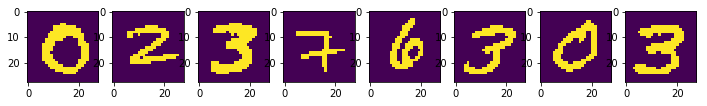

In [29]:
plt.rcParams["figure.figsize"] = (12,4)
show_digits([d[i,:] for i in range(8)])

Initialize the model with 10 components.

In [30]:
clf = BMM(n_comp=10,n_iter=3000)

In [31]:
clf = clf.fit(d)

In [32]:
clf.q_.shape

(784, 10)

In [33]:
clf.q_h_


array([0.12493777, 0.005     , 0.33007511, 0.19099592, 0.005     ,
       0.005     , 0.015     , 0.23899391, 0.02      , 0.06499728])

The 10 component vectors.

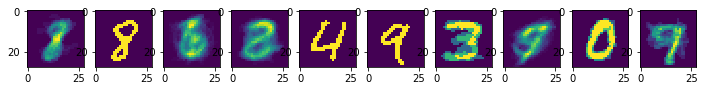

In [34]:
show_digits([clf.q_[:,i] for i in range(10)])